# D213 - Advanced Data Analytics - Task 2
By Krista Moik

## Table of Contents

### Part I. Research Question
    - A1. Research Question
    - A2. Objectives or Goals
    - A3. Prescribed Network

### Part II. Data Preparation
    - B1. Data Exploration
    - B2. Tokenization
    - B3. Padding Process
    - B4. Categories of Sentiment
    - B5. Steps to Prepare the Data
    - B6. Prepared Data Set

### Part III. Network Architecture
    - C1. Model Summary
    - C2. Network Architecture
    - C3. Hyperparameters

### Part IV. Model Evaluation
    - D1. Stopping Criteria
    - D2. Fitness
    - D3. Training Process
    - D4. Predictive Accuracy

### Part V. Summary and Recommendations
    - E. Code
    - F. Functionality
    - G. Recommendations

### Part VI. Reporting
    - H. Reporting
    - I. Sources for Third-Party Code
    - J. Sources
    - K. Professional Communication


## Part I. Research Question

### A1. Research Question

Using the provided data sets from UCI, my research question is: **Can I perform sentiment analysis by creating a Recurrent Neural Network (RNN) with Long Short-Term Memory (LSTM) to determine and predict if customer reviews are positive or negative?**


### A2. Objectives or Goals

My goal is to create an RNN model with LSTM to use Natural Language Processing (NLP) techniques to perform sentiment analysis on the reviews provided in the UCI data sets in order to create a model that can determine positive or negative reviews of products.  It is important for businesses to be able to quickly determine whether the language in reviews is favorable or not and can provide insights to the business as to what they are doing well and what can be improved.

### A3. Prescribed Network

I am choosing to use an RNN model due to its strengths in processing sequential data including text. An RNN model is somewhat unique in that it has the capability to loop back on itself, which helps the model to remember previous inputs in the sequence. The RNN is made up of multiple layers and embeddings that allow it to understand and retain relationships between words. LSTM assists in this process as it contains memory cells that can actually remember information over long sequences and helps control the flow of information (Luay, 2023).

## Part II. Data Preparation

#### Import Libraries/Packages

In [1]:
#import libraries/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import joblib

import sklearn
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
import random
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, GlobalAveragePooling1D, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from cleantext import clean
import emoji

[nltk_data] Downloading package punkt to C:\Users\Kmoik
[nltk_data]     WGU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Kmoik
[nltk_data]     WGU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Kmoik
[nltk_data]     WGU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#tensor flow version
tf.__version__

'2.16.1'

In [3]:
from platform import python_version
('Python version used for this analysis is: ', python_version())

('Python version used for this analysis is: ', '3.11.5')

#### Import Data Sets

In [4]:
#import Amazon data set
file_path=('C:/Users/Kmoik WGU/Desktop/D213/amazon_cells_labelled.txt')
amz=pd.read_csv(file_path, delimiter='\t', header=None, names=['review', 'rating'])
amz.head()

,review,rating
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [5]:
#import IMDB data set
file_path=('C:/Users/Kmoik WGU/Desktop/D213/imdb_labelled.txt')
imdb=pd.read_csv(file_path, delimiter='\t', header=None, names=['review', 'rating'])
imdb.head()

,review,rating
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [6]:
#import yelp data set
file_path=('C:/Users/Kmoik WGU/Desktop/D213/yelp_labelled.txt')
yelp=pd.read_csv(file_path, delimiter='\t', header=None, names=['review', 'rating'])
yelp.head()

,review,rating
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


All 3 data sets have an index column, review column, and rating column.  The review column is text, the rating column is 1s and 0s where, per the data set information, 1 is positive, and 0 represents a negative review (UC Irvine, 2015).  Since the files are all similarly structured, I can move forward with joining them.

In [7]:
#concat into 1 df
df=pd.concat([amz, imdb, yelp])
df.reset_index(inplace=True)

In [8]:
#renaming rating to sentiment
df.rename(columns={'rating': 'sentiment'}, inplace=True)

In [9]:
df.to_csv('C:/Users/Kmoik WGU/Desktop/D213/combined.csv')

#### View df

In [10]:
df.shape

(2748, 3)

In [11]:
df.head()

,index,review,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,"Good case, Excellent value.",1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      2748 non-null   int64 
 1   review     2748 non-null   object
 2   sentiment  2748 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 64.5+ KB


In [13]:
df.describe()

,index,sentiment
count,2748.000000,2748.000000
mean,465.203057,0.504367
std,276.612338,0.500072
min,0.000000,0.000000
25%,228.750000,0.000000
50%,457.500000,1.000000
75%,686.250000,1.000000
max,999.000000,1.000000


In [14]:
df['sentiment'].value_counts()

sentiment
1    1386
0    1362
Name: count, dtype: int64

In [15]:
df.info

<bound method DataFrame.info of       index                                             review  sentiment
0         0  So there is no way for me to plug it in here i...          0
1         1                        Good case, Excellent value.          1
2         2                             Great for the jawbone.          1
3         3  Tied to charger for conversations lasting more...          0
4         4                                  The mic is great.          1
...     ...                                                ...        ...
2743    995  I think food should have flavor and texture an...          0
2744    996                           Appetite instantly gone.          0
2745    997  Overall I was not impressed and would not go b...          0
2746    998  The whole experience was underwhelming, and I ...          0
2747    999  Then, as if I hadn't wasted enough of my life ...          0

[2748 rows x 3 columns]>

In [16]:
df['review'].value_counts()

review
If you like a loud buzzing to override all your conversations, then this phone is for you!                                                2
Works great!.                                                                                                                             2
Does not fit.                                                                                                                             2
The food was terrible.                                                                                                                    2
I won't be back.                                                                                                                          2
                                                                                                                                         ..
but it is great, i would really recommend it                                                                                              1
Makes it easi

## B1. Data Exploration

In [17]:
#check for duplicates
df.duplicated().sum()

0

In [18]:
#check for nulls
df.isnull().sum()

index        0
review       0
sentiment    0
dtype: int64

In [19]:
#check for nan
df.isna().sum()

index        0
review       0
sentiment    0
dtype: int64

In [20]:
#drop any nan
df.dropna()

,index,review,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,"Good case, Excellent value.",1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1
...,...,...,...
2743,995,I think food should have flavor and texture an...,0
2744,996,Appetite instantly gone.,0
2745,997,Overall I was not impressed and would not go b...,0
2746,998,"The whole experience was underwhelming, and I ...",0


In [21]:
#minimum and maximum review character length original data
print("Min Length: " , min(df['review'].str.len()))
print("Max Length: " , max(df['review'].str.len()))

Min Length:  7
Max Length:  7944


#### Reviewing text in review

In [22]:
#Initial list of words/characters in review
review=df['review']
list_of_chars=[]
for comment in review:
    for character in review:
        if character not in list_of_chars:
            list_of_chars.append(character)
print(list_of_chars)

['So there is no way for me to plug it in here in the US unless I go by a converter.', 'Good case, Excellent value.', 'Great for the jawbone.', 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!', 'The mic is great.', 'I have to jiggle the plug to get it to line up right to get decent volume.', 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.', 'If you are Razr owner...you must have this!', 'Needless to say, I wasted my money.', 'What a waste of money and time!.', 'And the sound quality is great.', 'He was very impressed when going from the original battery to the extended battery.', 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.', 'Very good quality though', 'The design is very odd, as the ear "clip" is not very comfortable at all.', 'Highly recommend for any one who has a blue tooth phone.', 'I advise EVERYONE DO NOT BE FOO

In [23]:
#view special characters
char_review=df['review']
alpha_chars=set()
num_chars=set()
non_num_chars=set()

for review in char_review:
    tokens=word_tokenize(review.lower())
    for token in tokens:
        for char in token:
            if re.match(r'[a-zA-Z]', char):
                alpha_chars.add(char)
            elif re.match(r'[0-9]', char):
                num_chars.add(char)
            else:
                non_num_chars.add(char)

print('Alpha Characters:')
print(alpha_chars)
print('Total of', len(alpha_chars), 'unique English letters in this dataset\n')

print('Numeric Characters:')
print(num_chars)
print('Total of', len(num_chars), 'unique numerical characters in this dataset\n')

print('Non-alphanumeric characters:')
print(non_num_chars)
print('Total of', len(non_num_chars), 'unique special characters in this dataset')

Alpha Characters:
{'h', 'z', 'v', 'c', 'u', 'b', 'e', 'i', 'a', 'm', 'y', 's', 'x', 'n', 'k', 'l', 'd', 'q', 'j', 'p', 'r', 'w', 'g', 't', 'o', 'f'}
Total of 26 unique English letters in this dataset

Numeric Characters:
{'6', '2', '1', '3', '8', '5', '9', '0', '4', '7'}
Total of 10 unique numerical characters in this dataset

Non-alphanumeric characters:
{'\x96', ')', '/', "'", ';', '+', '`', 'å', '#', ']', ',', 'é', '\x97', '-', '$', '[', '(', '&', 'ê', '?', '*', '!', '%', '.', ':'}
Total of 25 unique special characters in this dataset


#### Making text lowercase

In [24]:
df['review']=df['review'].str.lower()
df['review']

0       so there is no way for me to plug it in here i...
1                             good case, excellent value.
2                                  great for the jawbone.
3       tied to charger for conversations lasting more...
4                                       the mic is great.
                              ...                        
2743    i think food should have flavor and texture an...
2744                             appetite instantly gone.
2745    overall i was not impressed and would not go b...
2746    the whole experience was underwhelming, and i ...
2747    then, as if i hadn't wasted enough of my life ...
Name: review, Length: 2748, dtype: object

#### Removing Punctuation

In [25]:
df['review']=df['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['review']

0       so there is no way for me to plug it in here i...
1                               good case excellent value
2                                   great for the jawbone
3       tied to charger for conversations lasting more...
4                                        the mic is great
                              ...                        
2743    i think food should have flavor and texture an...
2744                              appetite instantly gone
2745    overall i was not impressed and would not go back
2746    the whole experience was underwhelming and i t...
2747    then as if i hadnt wasted enough of my life th...
Name: review, Length: 2748, dtype: object

#### Removing numbers

In [26]:
df['review'] = df['review'].apply(lambda x: re.sub(r'\d+', '', x))
df['review']

0       so there is no way for me to plug it in here i...
1                               good case excellent value
2                                   great for the jawbone
3       tied to charger for conversations lasting more...
4                                        the mic is great
                              ...                        
2743    i think food should have flavor and texture an...
2744                              appetite instantly gone
2745    overall i was not impressed and would not go back
2746    the whole experience was underwhelming and i t...
2747    then as if i hadnt wasted enough of my life th...
Name: review, Length: 2748, dtype: object

#### Removing special characters

In [27]:
df['review']=df['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['review']

0       so there is no way for me to plug it in here i...
1                               good case excellent value
2                                   great for the jawbone
3       tied to charger for conversations lasting more...
4                                        the mic is great
                              ...                        
2743    i think food should have flavor and texture an...
2744                              appetite instantly gone
2745    overall i was not impressed and would not go back
2746    the whole experience was underwhelming and i t...
2747    then as if i hadnt wasted enough of my life th...
Name: review, Length: 2748, dtype: object

#### Removing any Emoji

In [28]:
def remove_emojis(df):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F1E0-\U0001F1FF" 
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', df)

In [29]:
#tokenize text
def toknz(text):
    tokens = word_tokenize(text)
    return tokens
df['review']= df['review'].apply(lambda x: toknz(x))
df['review']

0       [so, there, is, no, way, for, me, to, plug, it...
1                          [good, case, excellent, value]
2                              [great, for, the, jawbone]
3       [tied, to, charger, for, conversations, lastin...
4                                   [the, mic, is, great]
                              ...                        
2743    [i, think, food, should, have, flavor, and, te...
2744                          [appetite, instantly, gone]
2745    [overall, i, was, not, impressed, and, would, ...
2746    [the, whole, experience, was, underwhelming, a...
2747    [then, as, if, i, hadnt, wasted, enough, of, m...
Name: review, Length: 2748, dtype: object

#### Stop Words

In [30]:
stop_word=set(stopwords.words('english'))
#excluding negatings words within stopwords
not_stop_word=['but', 'not', "aren't", 'couldn', "couldn't", "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
 "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
final_stop_words=set([word for word in stop_word if word not in not_stop_word])
def rmv_stop(txt):
    txt_stop=([w for w in txt if w not in final_stop_words])
    return txt_stop
df['review']=df['review'].apply(lambda x: rmv_stop(x))
df['review']

0                  [way, plug, us, unless, go, converter]
1                          [good, case, excellent, value]
2                                        [great, jawbone]
3       [tied, charger, conversations, lasting, minute...
4                                            [mic, great]
                              ...                        
2743              [think, food, flavor, texture, lacking]
2744                          [appetite, instantly, gone]
2745      [overall, not, impressed, would, not, go, back]
2746    [whole, experience, underwhelming, think, well...
2747    [hadnt, wasted, enough, life, poured, salt, wo...
Name: review, Length: 2748, dtype: object

#### Using PorterStemmer to shorten words to their root word

In [31]:
ps=PorterStemmer()
def stemmer(text):
    text=[ps.stem(word) for word in text]
    return text
df['review']=df['review'].apply(lambda x: stemmer(x))
df['review']

0                    [way, plug, us, unless, go, convert]
1                               [good, case, excel, valu]
2                                         [great, jawbon]
3       [tie, charger, convers, last, minutesmajor, pr...
4                                            [mic, great]
                              ...                        
2743                  [think, food, flavor, textur, lack]
2744                           [appetit, instantli, gone]
2745         [overal, not, impress, would, not, go, back]
2746    [whole, experi, underwhelm, think, well, go, n...
2747    [hadnt, wast, enough, life, pour, salt, wound,...
Name: review, Length: 2748, dtype: object

#### Find sequence lengths, max word length and vocabulary size

In [32]:
text_data=df['review'].astype(str)
tokenizer=Tokenizer()
tokenizer.fit_on_texts(text_data)
sequences=tokenizer.texts_to_sequences(text_data)
vocab_size=len(tokenizer.word_index)
print("Vocabulary Size:", vocab_size)
max_sequence_length=max(len(seq) for seq in sequences)
median_sequence_length=np.median([len(seq) for seq in sequences])
min_sequence_length=np.min([len(seq) for seq in sequences])
mean_sequence_length=np.mean([len(seq) for seq in sequences])
proposed_embedding_length=int(np.ceil(max_sequence_length * 0.1))
print("Proposed Embedding Length:", proposed_embedding_length)
print("Max Sequence Length:", max_sequence_length)
print("Median Sequence Length:", median_sequence_length)
print("Minimum Sequence Length:", min_sequence_length)
print("Mean Sequence Length:", mean_sequence_length)

Vocabulary Size: 4080
Proposed Embedding Length: 70
Max Sequence Length: 699
Median Sequence Length: 5.0
Minimum Sequence Length: 0
Mean Sequence Length: 6.868267831149927


In the above code lines, I explored the data, including determining whether certain characters were present in the data set. IN reviewing the different kinds of characters present in the data set, I confirmed that there were 26 unique letters - which is ideal as there are 26 letters in the alphabet and that means they are all represented as expected in the dataset.  Also as expected are all 10 unique numeric characters are present.  There are also 25 unique special characters which includes characters like punctuation.  

I started transforming the text in the review column by making all the text lowercase, removed punctuation, numbers, special characters, and emojis (DataCamp, StackOverflow and Western Governors University, n.d.).

Once my text was cleaned, I tokenized the words and removed stop words, but ensured that certain words like but and not remained as they are actually somewhat important in determining whether a review is positive or negative.  I then used PorterStemmer to shorten words to their root, or stem, word (Geeks for Geeks, n.d.).

Once my text was cleaned and reduced, I calculated the remaining vocabulary size to be 4,080.  I also obtained the proposed embedding length. The embeddings are vector representations of similar words and the proposed word embedding size for an RNN model is the dimensionality of the words embeddigns that will be input into the model. The proposed embedding length is 10% of the maximum sequence length.  The embedding length can be adjusted as needed to improve the model (Geeks for Geeks, n.d.).tion.


Finally, I obtained the mathematical determination of the longest sequence, the shortest sequence, the middle sequence length, and the average sequence length for text in the review column.

### B2. Tokenization

It is strange that the rubric appears to not be in the order in which the steps should be completed.  The goal of tokenization is to break down sentences into smaller peices, in this case, I broke each sentence/review into individual words, for processing and analysis (Geeks for Geeks, n.d.).  Above, I used word_tokenize from Natural Language Took Kit (NLTK) to tokenize the words left after cleaning to obtain parameters like the vocabulary count and sequence size.  Below I am using Tokenizer from TensorFlow Keras, as it is needed to use TensorFlow, to convert the tokenized words into integers to be used in the NLP I am creating (Geeks for Geeks, n.d.).

In [33]:
#tokenization
text_sequences=[' '.join(map(str, seq)) for seq in sequences]
tokenizer=Tokenizer()
tokenizer.fit_on_texts(text_sequences)
tokenized_sequences=tokenizer.texts_to_sequences(text_sequences)
tokenize=Tokenizer(num_words=None)
tokenize.fit_on_texts(df['review'])
df.review=tokenize.texts_to_sequences(df['review'])

In [34]:
df

,index,review,sentiment
0,0,"[52, 228, 119, 558, 17, 1816]",0
1,1,"[2, 65, 38, 324]",1
2,2,"[3, 960]",1
3,3,"[1242, 143, 647, 120, 1817, 96]",0
4,4,"[752, 3]",1
...,...,...,...
2743,995,"[48, 13, 204, 1197, 182]",0
2744,996,"[4076, 4077, 883]",0
2745,997,"[233, 1, 124, 22, 1, 17, 28]",0
2746,998,"[289, 94, 1732, 48, 20, 17, 4078, 302, 234, 11]",0


In [35]:
word_index=tokenize.word_index
word_index

{'not': 1,
 'good': 2,
 'great': 3,
 'movi': 4,
 'but': 5,
 'film': 6,
 'phone': 7,
 'one': 8,
 'like': 9,
 'work': 10,
 'time': 11,
 'place': 12,
 'food': 13,
 'servic': 14,
 'realli': 15,
 'bad': 16,
 'go': 17,
 'use': 18,
 'love': 19,
 'well': 20,
 'dont': 21,
 'would': 22,
 'get': 23,
 'best': 24,
 'even': 25,
 'ever': 26,
 'also': 27,
 'back': 28,
 'make': 29,
 'qualiti': 30,
 'recommend': 31,
 'look': 32,
 'product': 33,
 'disappoint': 34,
 'ive': 35,
 'made': 36,
 'charact': 37,
 'excel': 38,
 'im': 39,
 'headset': 40,
 'sound': 41,
 'nice': 42,
 'price': 43,
 'could': 44,
 'thing': 45,
 'better': 46,
 'watch': 47,
 'think': 48,
 'never': 49,
 'much': 50,
 'see': 51,
 'way': 52,
 'wast': 53,
 'batteri': 54,
 'act': 55,
 'first': 56,
 'say': 57,
 'didnt': 58,
 'tri': 59,
 'ear': 60,
 'pretti': 61,
 'year': 62,
 'got': 63,
 'come': 64,
 'case': 65,
 'still': 66,
 'worst': 67,
 'want': 68,
 'order': 69,
 'minut': 70,
 'enough': 71,
 'end': 72,
 'feel': 73,
 'amaz': 74,
 'two': 75,


#### splitting the data

In [36]:
#split data into 70% train, 15% test, and 15% validation
X=df['review']
y=df['sentiment']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20, random_state =42)
#adding validation split
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.50, random_state=42)
print(f'The shape of the training sets are {X_train.shape} for X and {y_train.shape} for y')
print(f'The shape of the validation sets are {X_valid.shape} for X and {y_valid.shape} for y')
print(f'The shape of the testing sets are {X_test.shape} for X and {y_test.shape} for y')

The shape of the training sets are (2198,) for X and (2198,) for y
The shape of the validation sets are (275,) for X and (275,) for y
The shape of the testing sets are (275,) for X and (275,) for y


### B3. Padding Processc
After my data was split into the train, test, and validation sets, I then padded the sequences so they were all the same size. I chose to pad at the end of the existing integers so 0s would be used to fill in the rest so all sequences had a length of 100 tokens, which is the maximum sequence length that I set (TensorFlow, n.d.). After the padding is added, below that I do provide an example of a single padded sequence from X_train_padded, row 90.e


In [37]:
max_sequence_length = 100
X_train_padded=pad_sequences(X_train, maxlen=max_sequence_length, padding='post')
X_valid_padded=pad_sequences(X_valid, maxlen=max_sequence_length, padding='post')
X_test_padded=pad_sequences(X_test, maxlen=max_sequence_length, padding='post')
print(f"Padded training data shape: {X_train_padded.shape}")
print(f"Padded validation data shape: {X_valid_padded.shape}")
print(f"Padded testing data shape: {X_test_padded.shape}")

Padded training data shape: (2198, 100)
Padded validation data shape: (275, 100)
Padded testing data shape: (275, 100)


##### example of a single padded sequence:

In [38]:
X_train_padded[99]

array([ 103,   10, 1888, 1889,    1,   10,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

##### Visualizing the split sets

In [39]:
X_train_padded

array([[  35,  123, 3382, ...,    0,    0,    0],
       [  49,  269,  798, ...,    0,    0,    0],
       [ 138, 2484,    0, ...,    0,    0,    0],
       ...,
       [  27,    3,   51, ...,    0,    0,    0],
       [   5,    4,   15, ...,    0,    0,    0],
       [ 120,   11,  127, ...,    0,    0,    0]])

In [40]:
X_test_padded

array([[   3,   18,  357, ...,    0,    0,    0],
       [2827,    1, 1086, ...,    0,    0,    0],
       [ 138,   31,  259, ...,    0,    0,    0],
       ...,
       [ 418,  608, 1225, ...,    0,    0,    0],
       [1198,  223, 4022, ...,    0,    0,    0],
       [ 314,   15,   23, ...,    0,    0,    0]])

In [41]:
X_valid_padded

array([[ 290,   23,   72, ...,    0,    0,    0],
       [ 500,    7,    3, ...,    0,    0,    0],
       [  13,  329, 1730, ...,    0,    0,    0],
       ...,
       [   8,   67,    6, ...,    0,    0,    0],
       [ 195, 1249,    0, ...,    0,    0,    0],
       [1660,  838, 1697, ...,    0,    0,    0]])

In [42]:
y_train

1670    0
2487    1
1124    0
2480    1
480     1
       ..
1638    0
1095    0
1130    1
1294    1
860     0
Name: sentiment, Length: 2198, dtype: int64

In [43]:
y_test

259     1
1289    1
411     1
567     1
557     1
       ..
847     0
1833    1
2541    1
2666    0
2457    0
Name: sentiment, Length: 275, dtype: int64

In [44]:
y_valid

1283    0
175     1
2539    0
80      1
2132    0
       ..
2234    1
1987    1
1642    0
430     1
1763    0
Name: sentiment, Length: 275, dtype: int64

### B4. Categories of Sentiment

The categories of sentiment are made up of only 0s and 1s, where 0 is a negative review and 1 is a positive review.
I will use the sigmoid activation function for the final dense layer of the RNN as it is well-suited for binary classification, which we confirmed our categories of sentiment are (Geeks for Geeks, n.d.).1.

In [45]:
sentiment_categories=df['sentiment'].unique()
print('sentiment categories', sentiment_categories)

sentiment categories [0 1]


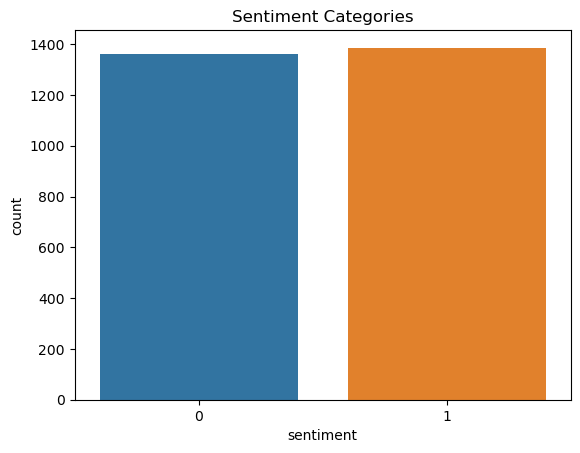

In [46]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Categories')
plt.show()

### B5. Steps to Prepare the Data

To prepare the data to create a neural network model, I first used the Anaconda Powershell to import TensorFlow so I could use import it into my Jupyter Notebook.  Once that was complete, I imported the packages I would use in my analysis.  The packages included pandas, numpy, matplotlib, seaborn, sklearn, re, tensorflow, keras, NLTK, cleantext and emoji.  I also had to download files such as stopwords for some of teh code to run.

I checked my TensorFlow and Python versions to make sure they were compatible.

Next, loaded the datasets into my IDE.  Luckily, the datasets were all similar in that they had an index column, a review column that held the text of the reviews left by customers, and a rating column made up of 0s and 1s, where 0s were negative reviews and 1s were positive.  This made it easy to combine the 3 documents into one DataFrame I called df to simplify my preparation and analysis.

I changed the rating column to sentiment, as that seemed to be a popular term in the provided course materials, and checked for duplicates and nulls.  After exploring the data, I used str.lower() to make all the review text lowercase, I removed punctuation, numeric, special, and emoji characters, added stop words and stemmed the remaining text.  

Then I tokenized the data to assign each word as an integer, split the data into train, test and validation sets, where the train set was an industry accepted 80% and the test set was the remaining 20%. I then added a validation set that split the test set in half, so the resulting test and validation sets were each 10% of the data.

After the data was split into the 3 sets, I then padded the resulting sequences with 0s added to the end for a maximum length of 100 to ensure the sequences were all the same length.

### B6. Prepared Data Set

Please see the attached CSV files of my prepared data sets. The CSV titled cleancombined is the prepared dataset that combines all 3 txt files that were imported. The CSV files titled X_trained_padded, X_test_padded, y_train, y_test, X_valid_padded, and y_valid are the split and padded data sets that will be used in training, testing, and validating my model.

In [47]:
#save prepared data set to CSV
df.to_csv('C:/Users/Kmoik WGU/Desktop/D213/cleancombined.csv')

In [48]:
#save splt data as dataframe
X_train_padded=pd.DataFrame(X_train_padded)
X_test_padded=pd.DataFrame(X_test_padded)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)
X_valid_padded=pd.DataFrame(X_valid_padded)
y_valid=pd.DataFrame(y_valid)

In [49]:
#save split data to CSV
X_train_padded.to_csv('C:/Users/Kmoik WGU/Desktop/D213/X_train_padded.csv')
X_test_padded.to_csv('C:/Users/Kmoik WGU/Desktop/D213/X_test_padded.csv')
y_train.to_csv('C:/Users/Kmoik WGU/Desktop/D213/y_train.csv')
y_test.to_csv('C:/Users/Kmoik WGU/Desktop/D213/y_test.csv')
X_valid_padded.to_csv('C:/Users/Kmoik WGU/Desktop/D213/X_valid_padded.csv')
y_valid.to_csv('C:/Users/Kmoik WGU/Desktop/D213/y_valid.csv')

## Part III. Network Architecture

### C1. Model Summary

The output of my TensorFlow model is provided below using the code model.summary() (Western Governors University, n.d.).

In [50]:
# Instantiate a sequential model
vocab_length=vocab_size
model=Sequential()
model.add(Embedding(vocab_length, 100, input_shape=(X_train_padded.shape[1],)))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 100)            │         408,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 450,305 (1.72 MB)

 Trainable params: 450,305 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
#early stopping
early_stopping_monitor=EarlyStopping(patience=3)
history=model.fit(X_train_padded, y_train, epochs=25, batch_size=64, validation_data=(X_valid_padded, y_valid))

Epoch 1/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.4988 - loss: 0.6939 - val_accuracy: 0.4764 - val_loss: 0.6940
Epoch 2/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.5248 - loss: 0.6929 - val_accuracy: 0.4764 - val_loss: 0.6944
Epoch 3/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.5158 - loss: 0.6924 - val_accuracy: 0.4764 - val_loss: 0.6946
Epoch 4/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.5259 - loss: 0.6929 - val_accuracy: 0.5236 - val_loss: 0.6930
Epoch 5/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4832 - loss: 0.6937 - val_accuracy: 0.4764 - val_loss: 0.6945
Epoch 6/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.4779 - loss: 0.6936 - val_accuracy: 0.4764 - val_loss: 0.6942
Epoch 7/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5202 - loss: 0.6928 - val_accuracy: 0.4764 - val_loss: 0.6938
Epoch 8/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5265 - loss: 0.6927 - val_accuracy: 0.4764 - v

### C2. Network Architecture

My model above was a Sequential() model that consisted of 4 layers. The first layer was the Embedding Layer, which converts the input sequences into vectors (Geeks for Geeks, n.d.).. This layer indicates the vocabulary, the embedding dimension, and input shape. This resulted in a total of 408,000 parameters, which made it the largest layer. This was determined by vocab_size 4080 x 100.

The next layer was the LSTM layer set to 64 units, meaning it will produce a 64 dimensional output at each step. This resulted in a total of 42,240 parameters, making it the next largest layer. I chose this layer because it is effective in processing sequential data adn can retain a memory over long sequences (Geeks for Geeks, n.d.).

The third layer was the Dropout layer, which is applied to the LSTM output to prevent overfitting. The 0.2 indicates that 20% of the selected neurons are randomly ignored during training (Brownlee, 2022). This layer had 0 parameters.

The fourth layers was the Dense layer, which is the output layer. The 1 sets the output to a single node with a sigmoid activation, which is good for binary classification. The final output would be a a single value - 0 for negative, 1 for positive (Wisam, Essam, 2022). This layer had a total of 65 parameters.

### C3. Hyperparameters

The activation function was chosen to be sigmoid since it is good for binary classification.

The number of nodes on my embedding layer was 4,080, which is the size of the vocabulary. I did not reduce the vocabulary size as I did not think that the vocabulary was very large for the data set. I did try several models adjusting the number of nodes with no noticeable difference, so I kept it as the vocabulary size to keep it simple in understanding what and why it was.

The loss function was set to binary crossentropy as it is well-suited for values between 0 and 1 (Brownlee, 2020).

The optimizer was chosen to be adam as it is straightforward, does not need much memory, is good for a high number of parameters, and is adaptive (Brownlee, 2021).

The stopping criteria for my model was set to patience=3, which would stop the model from continuing after 3 poor performance epochs (Western Governors University, n.d.).

Finally, the evaluation metric for this model was accuracy, which had the model fitted and focus on increasing the accuracy of the train data set.metric


## Part IV. Model Evaluation

### D1. Stopping Criteria

The final epoch can be seen above - epoch 25 of 25. I set the epoch to run through 25 iterations of the training data as it is experimental and usually around 20-50 for data the size of ours (Western Governors University, n.d.). The patience=3 did not apply so the model was not stopped early and it ran through all 25 iterations it was set to do. Unfortunately, the model was determined to be not very accurate. Epoch 6 was the most accurate with an accuracy of 54%, validation accuracy of just 47%, loss at 69% and accuracy loss at 69%. The range of accuracy in the model was 47-54% accurate with each epoch fluctuating up or down within that range. I did test increasing the epochs and increasing and decreasing the patience number with no real effect on the results. Potentially, I could have run through the entire set but chose not to as I saw no real improvement with increased epochs and did not want to waste the memory or processing of such a large amount.

### D2. Fitness

As stated above, the model was determined to be not very accurate. The range of accuracy in the model was 47-54% accurate with each epoch fluctuating up or down within that range, while the loss and validation loss remained around 69%. Evaluating our test set (below) confirms similar accuracy of 50% and loss of 69% (Western Governors University, n.d.). This indicates the model has not learned the data well and is not confident in its predictions. These numbers also suggest possible underfitting. To address this, I did change the train data percentage, increasing and decreasing it with no real effect. Additionally, I tried changing the activation function type and adding layers such as flatten and GlobalAveragePooling1D, without an increase in accuracy. Potentially, more data may also be needed to increase the performance and fit of the model

In [52]:
# Evaluate model 
model.evaluate(X_test_padded, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5060 - loss: 0.6933


[0.6961275339126587, 0.4654545485973358]

In [53]:
#Evaluate the model
score=model.evaluate(X_test_padded, y_test, verbose=1)
print('test score:', score[0])
print('test accuracy:', score[1])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5060 - loss: 0.6933
test score: 0.6961275339126587
test accuracy: 0.4654545485973358


### D3. Training Process

The first plot below visualizes and compares teh training accuracy with the validationa accuracy. Clearly they are not an ideal fit as the accuracy of the validation set remained constant while the training accuracy fluctuated quite a bit that involved deep valleys into less accuracy with smaller peaks towards accuracy.

Below that is a plot visualizing and comparing the training loss with validation loss. This graph shows a better fit with the two increasing and decreasing together.

The third plot compares training loss with training accuracy. The plot is indicative of our results above where accuracy remains low and uncertainty in the predictions remains high.

The fourth plot compares the validation loss with validation accuracy with the same results as the 3rd plot - accuracy remains low and uncertainty in the predictions remains high.


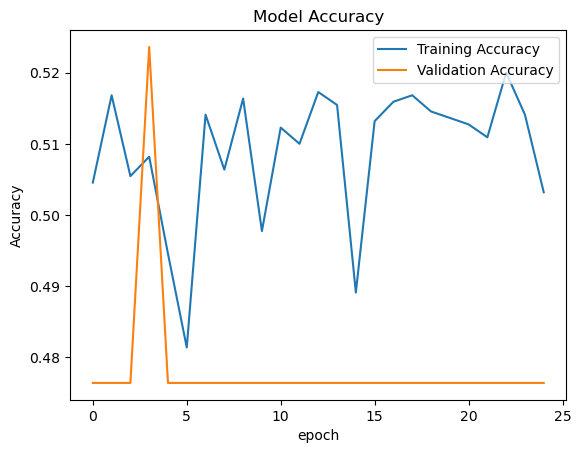

In [54]:
#Visualize training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

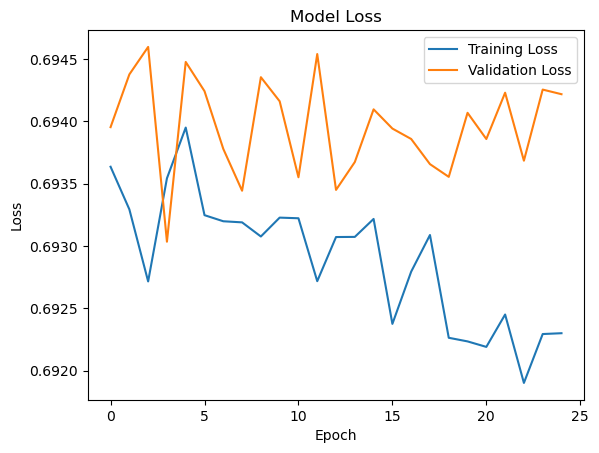

In [55]:
#Visualize training loss with validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

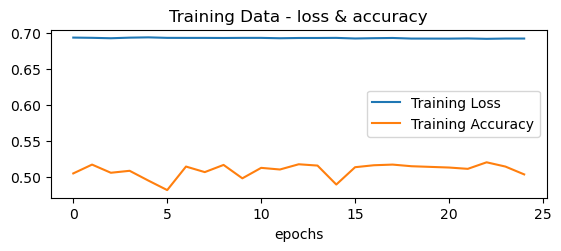

In [56]:
#Visualize training loss vs training accuracy
plt.subplot(2,1,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Data - loss & accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

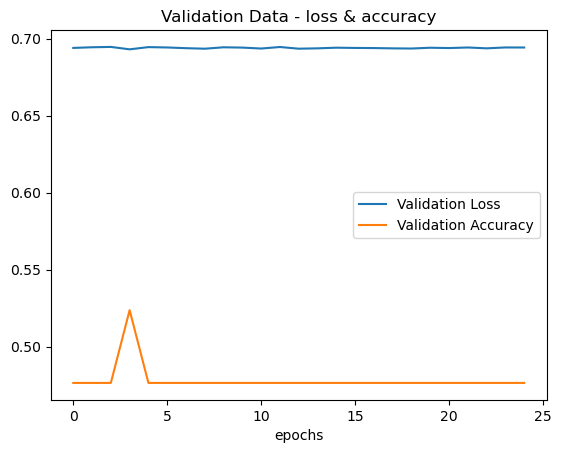

In [57]:
#visualize validation loss vs validation accuracy
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Data - loss & accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show

### D4. Predictive Accuracy

The trained predictive accuracy is shown in the code below (Western Governors University, n.d.). I obtained one positive and one negative review from the data sets that were imported above and attempted to predict whether it was a positive or negative review. The model determined both were positive with a 51% probability. While one was in fact positive, the model was only 50% accurate, as the model thought the negative review was also positive. This is inline with what was determined above.

In [ ]:
predictions=model.predict(X_test_padded)
binary_predictions=(predictions > 0.5).astype(int)

In [ ]:
def predict_sentiment(review):
    tw = tokenizer.texts_to_sequences([review])
    tw = pad_sequences(tw, maxlen=200)
    prediction = model.predict(tw)
    if prediction > 0.5:
        print(f"Predicted label: Positive (Probability: {prediction[0][0]})")
    else:
        print(f"Predicted label: Negative (Probability: {1 - prediction[0][0]})")

test_sentence1 = "I bought this to use with my Kindle Fire and absolutely loved it!"
predict_sentiment(test_sentence1)

test_sentence2 = "I only hear garbage for audio."
predict_sentiment(test_sentence2)

## Part V. Summary and Recommendations

### E. Code

The full code used is provided above.

This model was saved with the code below (Western Governors University, n.d.):

In [ ]:
#saving the model
model.save('D213_model.keras')

### F. Functionality

**Discuss the functionality of your neural network, including the impact of the network architecture.**

My model is essentially not function as it was only about 50% accurate in its predictions. Ideally, such a model would be closer to at least 70% accurate and with a confidence rate much lower than what it currently is, with the loss percentage being around 69%.

The network architecture is fairly simple in its current iterations. Attempts at building a more complex model to increase accuracy did not work, but that does not mean that is not a potential solution.

Ultimately, I was able to build an RNN model using LSTM that could perform sentiment analysis to determine if reviews were positive or negative, however, there ultimately needs to be more data or perhaps other tweaks to make this model more accurate and thus more useful.

### G. Recommendations

Based on my model that was essentially only correct 50% of the time, I would recommend increasing the amount of data/reviews to help increase its learning potential and thus accuracy. I would look in to altering the stop words that were removed or kept, perhaps forgoing stemming or lemmatization, and then researching additional layers to add to my model that might be better suited for sentiment analysis.

## Part VI. Reporting

### H. Reporting

This section requires me to create a report using an industry-relevant interactive development enviroment but provides little guidance after that. As I have completed this task using Jupyter Notebook with appropriate formatting added, this document will act as my report.

### I. Sources for Third-Party Code

Brownlee, Jason. (2021). *How to Use Word Embedding Layers for Deep Learning with Keras*. Machine Learning Mastery. https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

Stack Overflow. (n.d.). *Removing Emoji from a String in Python*. Stack Overflow. https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

Western Governors University. (n.d.). *D213 Task 2 Data Preprocessing in Python*. WGU. [Video]. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=8639374a-964b-4ae9-b33b-b1210052c07d

DataCamp. (n.d.). *https://app.datacamp.com/learn/courses/introduction-to-natural-language-processing-in-python*. DataCamp. https://app.datacamp.com/learn/courses/introduction-to-natural-language-processing-in-python

Geeks for Geeks. (n.d.). *Removing stop words with NLTK in Python*.  Geeks for Geeks.  https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

Geeks for Geeks. (n.d.). *Introduction to NLTK: Tokenization, Stemming, Lemmatization, POS Tagging*. Geeks for Geeks. https://www.geeksforgeeks.org/introduction-to-nltk-tokenization-stemming-lemmatization-pos-tagging/?ref=lbp

SkillC. (n.d.). *Sentiment Analysis with LSTM | Deep Learning with Keras | Neural Networks | Project#8*. YouTube. [Video]. https://www.youtube.com/watch?v=oWo9SNcyxlI

TensorFlow (n.d.). *Understanding Masking and Padding*. TensorFlow. https://www.tensorflow.org/guide/keras/understanding_masking_and_padding

Western Governors University. (n.d.). *D213 Task 2 Building NN Model in Python*. WGU. [Video]. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=1b9aff54-735f-456a-a6b4-b11b00eb8d2f

Western Governors University. (n.d.). *D213 Webinar 6 SA*. WGU. [Video]. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c3890312-a194-4f3a-b579-af8901300903

### J. Sources

UC Irvine. (2015). *Sentiment Labelled Sentences*. UCI. https://archive.ics.uci.edu/dataset/331/sentiment+labelled+sentences

Luay, Mohammad. (2023). *Sentiment Analysis using Recurrent Neural Network (RNN), Long Short Term Memory (LSTM) and Convolutional Neural Network (CNN) with Keras*. Medium. https://medium.com/@muhammadluay45/sentiment-analysis-using-recurrent-neural-network-rnn-long-short-term-memory-lstm-and-38d6e670173f

Geeks for Geeks. (n.d.). *Word Embeddings in NLP*. Geeks for Geeks. https://www.geeksforgeeks.org/word-embeddings-in-nlp/?ref=previous_article

Geeks for Geeks. (n.d.). *Introduction to NLTK: Tokenization, Stemming, Lemmatization, POS Tagging*. Geeks for Geeks. https://www.geeksforgeeks.org/introduction-to-nltk-tokenization-stemming-lemmatization-pos-tagging/?ref=lbp

TensorFlow (n.d.). *Understanding Masking and Padding*. TensorFlow. https://www.tensorflow.org/guide/keras/understanding_masking_and_padding

Geeks for Geeks. (n.d.). *Activation functions in Neural Networks*. Geeks for Geeks. https://www.geeksforgeeks.org/activation-functions-neural-networks/

Brownlee, Jason. (2022). *Dropout Regularization in Deep Learning Models with Keras*. Machine Learning Mastery. https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

Wisam, Essam, (2022). *Demystifying Recurrent Neural Network(RNNs)*. Towards Data Science. https://towardsdatascience.com/unriddling-rnns-with-depth-and-in-both-directions-9ed336c4b392#:~:text=Recurrent%20Neural%20Networks,-We%20can%20try&text=This%20means%20that%20when%20the,it%20in%20the%20same%20sequence.

Brownlee, Jason. (2020). *How to Choose Loss Functions When Training Deep Learning Neural Networks*. Machine Learning Mastery. https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

Brownlee, Jason. (2021). *Gentle Introduction to the Adam Optimization Algorithm for Deep Learning*. Machine Learning Mastery. https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

### K. Professional Communication